Machine learn - Classificação - Procurar um padrao e criar um algoritimo que possa prever uma ação

In [117]:
import pandas as pd

In [118]:
df = pd.read_csv('marketing_investimento.csv')

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   idade                   1268 non-null   int64 
 1   estado_civil            1268 non-null   object
 2   escolaridade            1268 non-null   object
 3   inadimplencia           1268 non-null   object
 4   saldo                   1268 non-null   int64 
 5   fez_emprestimo          1268 non-null   object
 6   tempo_ult_contato       1268 non-null   int64 
 7   numero_contatos         1268 non-null   int64 
 8   aderencia_investimento  1268 non-null   object
dtypes: int64(4), object(5)
memory usage: 89.3+ KB


In [120]:
import plotly.express as px

In [121]:
px.histogram(df, x='aderencia_investimento', text_auto=True)

In [122]:
px.histogram(df, x='estado_civil', text_auto=True, color='aderencia_investimento', barmode='group')

In [123]:
px.histogram(df, x='escolaridade', text_auto=True, color='aderencia_investimento', barmode='group')

In [124]:
px.histogram(df, x='inadimplencia', text_auto=True, color='aderencia_investimento', barmode='group')

In [125]:
px.histogram(df, x='fez_emprestimo', text_auto=True, color='aderencia_investimento', barmode='group')

In [126]:
px.box(df, x='idade', color='aderencia_investimento')

In [127]:
px.box(df, x='saldo', color='aderencia_investimento')

In [128]:
px.box(df, x='tempo_ult_contato', color='aderencia_investimento')

In [129]:
px.box(df, x='numero_contatos', color='aderencia_investimento')

In [130]:
df.describe()

,idade,saldo,tempo_ult_contato,numero_contatos
count,1268.000000,1268.000000,1268.000000,1268.000000
mean,41.376972,1443.426656,367.574921,2.715300
std,11.383805,2690.406767,347.969723,2.885642
min,19.000000,-1206.000000,5.000000,1.000000
25%,33.000000,91.250000,134.000000,1.000000
50%,39.000000,491.500000,251.000000,2.000000
75%,49.000000,1623.500000,488.250000,3.000000
max,87.000000,27069.000000,3025.000000,32.000000


In [131]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

In [132]:
df = pd.read_csv('marketing_investimento.csv')

In [133]:
colunas = df.columns

In [135]:
one_hot = make_column_transformer((
    OneHotEncoder(drop='if_binary'),
    ['estado_civil', 'escolaridade', 'inadimplencia', 'fez_emprestimo']
),
    remainder = 'passthrough',
    sparse_threshold=0)

In [136]:
df = one_hot.fit_transform(df)

In [137]:
one_hot.get_feature_names_out(colunas)

array(['onehotencoder__estado_civil_casado (a)',
       'onehotencoder__estado_civil_divorciado (a)',
       'onehotencoder__estado_civil_solteiro (a)',
       'onehotencoder__escolaridade_fundamental',
       'onehotencoder__escolaridade_medio',
       'onehotencoder__escolaridade_superior',
       'onehotencoder__inadimplencia_sim',
       'onehotencoder__fez_emprestimo_sim', 'remainder__idade',
       'remainder__saldo', 'remainder__tempo_ult_contato',
       'remainder__numero_contatos', 'remainder__aderencia_investimento'],
      dtype=object)

In [138]:
df = pd.DataFrame(df, columns= one_hot.get_feature_names_out(colunas))

In [139]:
from sklearn.preprocessing import LabelEncoder

In [140]:
labal_ecoder = LabelEncoder()

In [ ]:
x = df.drop(['remainder__aderencia_investimento'], axis=1)
y = df['remainder__aderencia_investimento']

In [142]:
y = labal_ecoder.fit_transform(y)

In [143]:
y

array([1, 1, 0, ..., 1, 1, 1])

Criação do modelo de teste

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=5)

Criando os primeiros testes

In [146]:
from sklearn.dummy import DummyClassifier

In [147]:
dummy = DummyClassifier()
dummy.fit(x_train, y_train)

dummy.score(x_test, y_test)

0.6025236593059937

Arvore de decisão

In [148]:
from sklearn.tree import DecisionTreeClassifier

In [149]:
tree = DecisionTreeClassifier(random_state=5)
tree.fit(x_train, y_train)

ValueError: could not convert string to float: 'casado (a)'

In [ ]:
tree.predict(x_test)

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,

In [ ]:
tree.score(x_test, y_test)

0.6656151419558359

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [ ]:
nome_colunas = ['casado (a)',
                'divorciado (a)',
                'solteiro (a)',
                'fundamental',
                'medio',
                'superior',
                'inadimplencia',
                'fez_emprestimo',
                'idade',
                'saldo',
                'tempo_ult_contato',
                'numero_contatos']


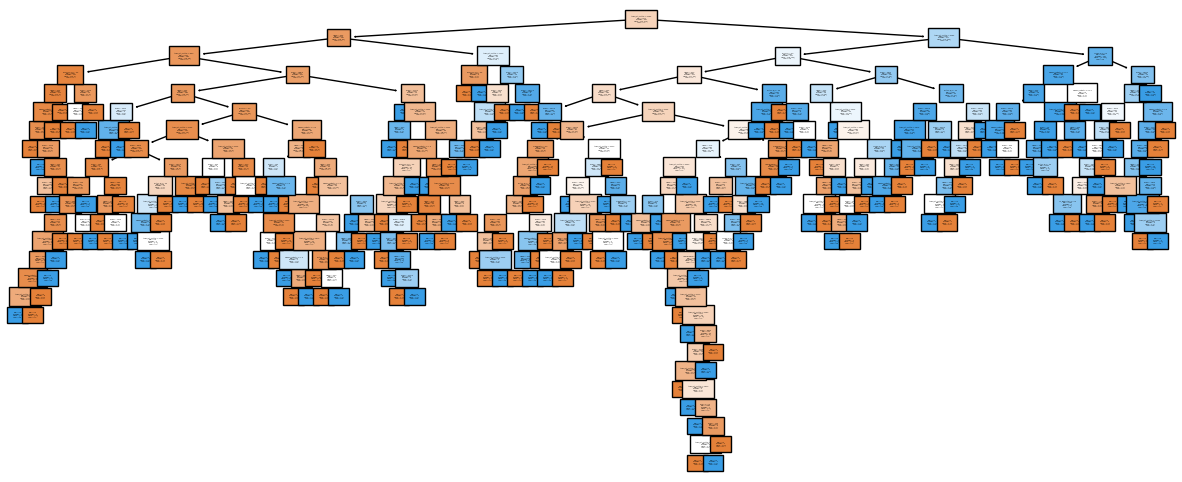

In [ ]:
plt.figure(figsize=(15, 6))
plot_tree(tree, filled=True, class_names=['nao', 'sim'], fontsize=1, feature_names=nome_colunas);

In [ ]:
tree.score(x_train, y_train)

1.0

In [ ]:
tree = DecisionTreeClassifier(random_state=5, max_depth=3)
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=5)

In [ ]:
tree.score(x_train, y_train)

0.7613038906414301

In [ ]:
tree.score(x_test, y_test)

0.7160883280757098

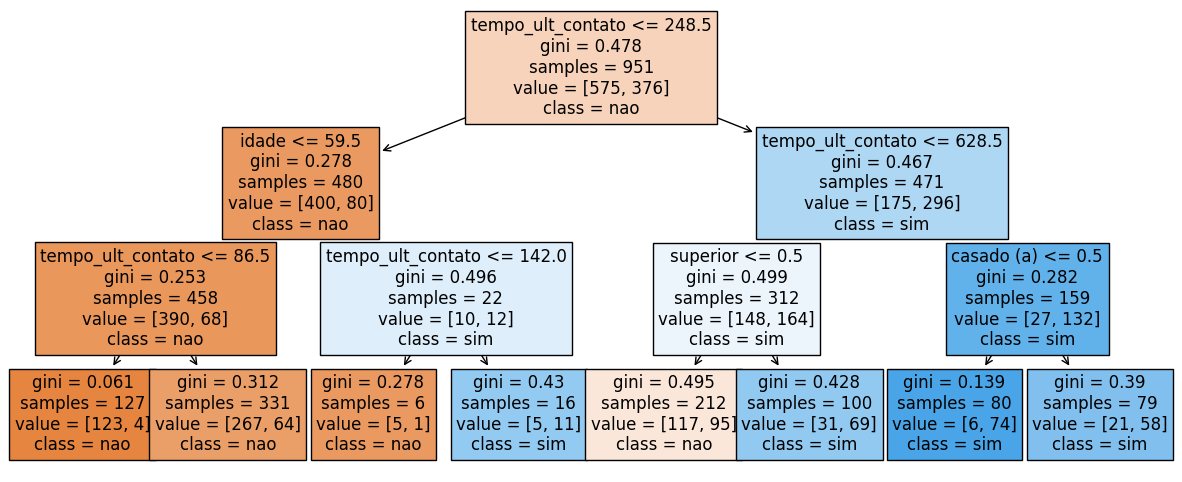

In [ ]:
plt.figure(figsize=(15, 6))
plot_tree(tree, filled=True, class_names=['nao', 'sim'], fontsize=12, feature_names=nome_colunas);

Tentar fazer ele acertar se é possivel ele aprender na "MARRA" qual são os tipos de veiculos... Vai ajudar no FIC

Machine learn por Distancia! - KNN

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
normalização = MinMaxScaler()
x_train_normalization = normalização.fit_transform(x_train)

In [ ]:
pd.DataFrame(x_train_normalization)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.205882,0.065564,0.123734,0.032258
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.147059,0.045792,0.396527,0.032258
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.338235,0.076036,0.335022,0.000000
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.573529,0.062866,0.315123,0.000000
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.338235,0.148380,0.065847,0.129032
...,...,...,...,...,...,...,...,...,...,...,...,...
946,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.191176,0.044265,0.246382,0.129032
947,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.205882,0.028043,0.275687,0.032258
948,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.323529,0.042952,0.024964,0.129032
949,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.176471,0.042810,0.023878,0.000000


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(x_train_normalization, y_train)

KNeighborsClassifier()

In [ ]:
x_test_normalization = normalização.transform(x_test)

In [ ]:
knn.score(x_test_normalization, y_test)

0.6876971608832808

In [ ]:
print(f'Taxa de acerto Dummy: {dummy.score(x_test, y_test)}')
print(f'Taxa de acerto Arvore: {tree.score(x_test, y_test)}')
print(f'Taxa de acerto knn: {knn.score(x_test_normalization, y_test)}')

Taxa de acerto Dummy: 0.6025236593059937
Taxa de acerto Arvore: 0.7160883280757098
Taxa de acerto knn: 0.6876971608832808


In [ ]:
import pickle

In [ ]:
with open('modelo_onehotenc.pkl', 'wb') as aquivo:
    pickle.dump(one_hot, aquivo)

In [ ]:
with open('modelo_arvore.pkl', 'wb') as aquivo:
    pickle.dump(tree, aquivo)

In [ ]:
novo_dado = {
    'idade': [45],
    'estado_civil':['solteiro (a)'],
    'escolaridade':['superior'],
    'inadimplencia': ['nao'],
    'saldo': [23040],
    'fez_emprestimo': ['nao'],
    'tempo_ult_contato': [800],
    'numero_contatos': [4]
}


In [ ]:
new_data = pd.DataFrame(novo_dado)
new_data

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos
0,45,solteiro (a),superior,nao,23040,nao,800,4


In [ ]:
modelo_onehot = pd.read_pickle('D:\Alura\Machine learning\modelo_onehotenc.pkl')
modelo_tree = pd.read_pickle('D:\Alura\Machine learning\modelo_arvore.pkl')

In [ ]:
modelo_tree.predict(new_data)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- escolaridade
- estado_civil
- fez_emprestimo
- idade
- inadimplencia
- ...
Feature names seen at fit time, yet now missing:
- onehotencoder__escolaridade_fundamental
- onehotencoder__escolaridade_medio
- onehotencoder__escolaridade_superior
- onehotencoder__estado_civil_casado (a)
- onehotencoder__estado_civil_divorciado (a)
- ...


In [ ]:
novo_dado = modelo_onehot.transform(new_data)

ValueError: columns are missing: {'aderencia_investimento'}